In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        # Create a trainable weight variable for the centers of the RBFs
        self.centers = self.add_weight(name='centers',
                                      shape=(self.units, input_shape[-1]),
                                      initializer='uniform',
                                      trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        # Calculate the radial basis functions for each input sample and each RBF center
        diff = K.expand_dims(inputs) - self.centers  # shape: (batch_size, units, input_dim)
        norm = K.sum(K.square(diff), axis=-1)  # shape: (batch_size, units)
        rbf = K.exp(-self.gamma * norm)  # shape: (batch_size, units)

        return rbf

    def compute_output_shape(self, input_shape):
        return input_shape[0], self.units

In [9]:
# load Pivot data
url = 'https://raw.githubusercontent.com/ravsssh/HandballPrediction/main/Handball%20Prediction/data/CB.csv'
df = pd.read_csv(url, delimiter=';')
# Menentukan input and output
X = df.drop(columns=["GOAL","7MSHOT","9MSHOT","6MSHOT","WINGSHOT","PIVOTSHOT","FASTBREAKSHOT"])
y = df.GOAL
# Membagi data set 80 : 20 train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Merancang Neural Network Model
model = Sequential()
model.add(Flatten(input_shape=(6,)))  
model.add(RBFLayer(6, 0.5))
model.add(Dense(1, activation='linear'))
learning_rate = 0.001
optimizer = RMSprop(learning_rate=learning_rate)
model.compile(loss='mse', optimizer=optimizer)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# Melatih arsitektur model terhadap dataset
model.fit(X_train, y_train, batch_size=8, epochs=100)

Epoch 1/100
129/129 [==============================] - 1s 1ms/step - loss: 4.4973
Epoch 2/100
129/129 [==============================] - 0s 1ms/step - loss: 4.1672
Epoch 3/100
129/129 [==============================] - 0s 1ms/step - loss: 3.8651
Epoch 4/100
129/129 [==============================] - 0s 993us/step - loss: 3.5820
Epoch 5/100
129/129 [==============================] - 0s 2ms/step - loss: 3.3139
Epoch 6/100
129/129 [==============================] - 0s 1ms/step - loss: 3.0974
Epoch 7/100
129/129 [==============================] - 0s 1ms/step - loss: 2.9150
Epoch 8/100
129/129 [==============================] - 0s 1ms/step - loss: 2.7783
Epoch 9/100
129/129 [==============================] - 0s 1ms/step - loss: 2.6630
Epoch 10/100
129/129 [==============================] - 0s 1ms/step - loss: 2.5590
Epoch 11/100
129/129 [==============================] - 0s 1ms/step - loss: 2.4589
Epoch 12/100
129/129 [==============================] - 0s 961us/step - loss: 2.3704
Epoch 13/

9/9 [==============================] - 0s 1ms/step


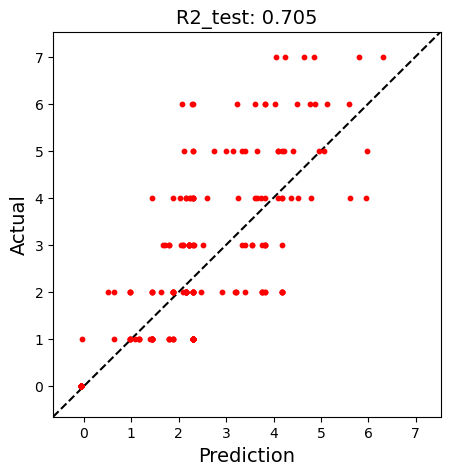

In [10]:
    
    pred_test = model.predict(X_test)
    # evaluation
    plt.figure(figsize=(11, 5))

    

    plt.subplot(122)
    plt.scatter(pred_test, y_test, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_test: {r2_score(y_test, pred_test):.3f}", fontsize=14)
    
    plt.show()
   


In [9]:
X

,7MACC,6MACC,9MACC,WINGACC,PIVOTACC,FASTBREAKACC
0,0.0,1.00,0.33,0.0,0.0,0.0
1,0.0,0.75,0.00,0.0,1.0,0.0
2,0.0,1.00,0.00,0.0,0.0,0.0
3,0.0,0.00,0.50,0.0,0.0,0.0
4,0.0,0.00,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...
1283,0.0,0.00,0.00,0.0,0.0,0.0
1284,0.0,1.00,0.00,0.0,0.0,1.0
1285,0.0,1.00,0.00,0.0,0.0,0.0
1286,0.0,0.00,0.00,0.0,0.0,0.0


In [15]:
urlacc = 'https://raw.githubusercontent.com/ravsssh/HandballPrediction/main/Handball%20Prediction/data/Sensitivity/ACC.csv'
acc_df = pd.read_csv(urlacc, delimiter = ';')
acc_sensitivity = model.predict(acc_df)
print(acc_sensitivity)

3/3 [==============================] - 0s 2ms/step
[[ 0.00868928]
 [ 0.1381185 ]
 [ 0.3270446 ]
 [ 0.58261335]
 [ 0.901345  ]
 [ 1.2648517 ]
 [ 1.6387587 ]
 [ 1.9765654 ]
 [ 2.2285466 ]
 [ 2.35359   ]
 [ 2.3301525 ]
 [ 0.00868928]
 [ 0.32077777]
 [ 0.7189599 ]
 [ 1.1847535 ]
 [ 1.6784564 ]
 [ 2.1423304 ]
 [ 2.5106585 ]
 [ 2.7246952 ]
 [ 2.747952  ]
 [ 2.5763676 ]
 [ 2.239465  ]
 [ 0.00868928]
 [ 0.37318814]
 [ 0.7304874 ]
 [ 1.045946  ]
 [ 1.3004481 ]
 [ 1.4896561 ]
 [ 1.6199757 ]
 [ 1.7034341 ]
 [ 1.753257  ]
 [ 1.7810352 ]
 [ 1.7955196 ]
 [ 0.00868928]
 [ 0.18046021]
 [ 0.3059728 ]
 [ 0.36462545]
 [ 0.34628773]
 [ 0.2541597 ]
 [ 0.1038599 ]
 [-0.08090317]
 [-0.274428  ]
 [-0.45473713]
 [-0.6072231 ]
 [ 0.00868928]
 [ 0.06079191]
 [ 0.15235782]
 [ 0.26872772]
 [ 0.3933109 ]
 [ 0.5113894 ]
 [ 0.6127228 ]
 [ 0.6924257 ]
 [ 0.75030226]
 [ 0.78928643]
 [ 0.81372297]
 [ 0.00868928]
 [ 0.1262601 ]
 [ 0.2813057 ]
 [ 0.46939498]
 [ 0.67730063]
 [ 0.8832112 ]
 [ 1.0598516 ]
 [ 1.1801825 ]
 [ 1

In [12]:
pd.DataFrame(acc_sensitivity).to_csv('sensitivitasaccuracy.xls', index=False)